In [1]:
import shap
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [31]:
data1 = pd.read_csv('../Dataset/original_training_dataset1_70_30.csv')
data2 = pd.read_csv('../Dataset/Training/Dataset2/70_30_train.csv')

In [3]:
data1 = data1[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_percent_url', 'qty_dollar_url', 'url_google_index', 'tld_present_params', 'qty_redirects', 'length_url', 'url_shortened', 'domain_length', 'domain_in_ip', 'phishing']]

In [4]:
data2 = data2[['total_of.', 'total_of-', 'total_of_', 'total_of/', 'total_of?', 'total_of=', 'total_of@', 'total_of&', 'total_of~', 'total_of,', 'total_of*', 'total_of%', 'total_of$', 'google_index', 'tld_in_path', 'nb_redirection', 'url_length', 'shortening_service', 'hostname_length', 'ip', 'status']]

In [5]:
print(len(data1.columns), len(data2.columns))

21 21


In [6]:
data2.columns =  data1.columns

In [7]:
phish_df1 = data1[data1['phishing']==1]
phish_df1 = phish_df1.sample(n=6800, random_state=42)

In [8]:
phish_df1

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_tilde_url,qty_comma_url,...,qty_percent_url,qty_dollar_url,url_google_index,tld_present_params,qty_redirects,length_url,url_shortened,domain_length,domain_in_ip,phishing
33388,2,0,0,3,0,0,0,0,0,0,...,0,0,0,-1,0,45,0,16,0,1
2281,2,0,1,4,0,3,0,2,0,0,...,0,0,0,0,0,213,0,16,0,1
21431,1,0,0,2,0,0,0,0,0,0,...,0,0,0,-1,0,26,0,14,0,1
18339,2,0,0,1,0,0,0,0,0,0,...,0,0,0,-1,0,44,0,33,0,1
3851,2,0,0,3,0,0,0,0,0,0,...,0,0,0,-1,1,47,0,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52773,1,0,0,2,0,0,0,0,0,0,...,0,0,0,-1,1,26,0,22,0,1
41166,3,2,1,1,0,11,0,10,0,0,...,5,0,0,1,0,238,0,14,0,1
32072,1,0,1,9,0,1,0,0,0,0,...,0,0,0,-1,0,145,0,16,0,1
47877,1,1,0,1,0,0,0,0,0,0,...,0,0,1,-1,0,20,0,19,0,1


In [9]:
leg_df1 = data1[data1['phishing']==0]
leg_df1 = phish_df1.sample(n=6800, random_state=42)

In [10]:
leg_df1

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_tilde_url,qty_comma_url,...,qty_percent_url,qty_dollar_url,url_google_index,tld_present_params,qty_redirects,length_url,url_shortened,domain_length,domain_in_ip,phishing
56532,6,1,0,9,0,1,1,0,0,0,...,0,0,0,1,1,110,0,27,0,1
51148,3,0,0,6,0,1,1,0,0,0,...,0,0,0,1,0,93,0,16,0,1
2258,3,0,0,4,0,0,0,0,0,0,...,0,0,0,-1,0,47,0,16,0,1
174,3,0,0,3,0,0,0,0,0,0,...,0,0,0,-1,0,38,0,17,0,1
47191,2,0,0,3,0,0,0,0,0,0,...,0,0,0,-1,0,53,0,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,2,0,0,1,0,0,0,0,0,0,...,0,0,0,-1,0,37,0,36,0,1
40318,2,1,0,3,0,0,0,0,0,0,...,0,0,0,-1,0,29,0,20,0,1
14001,2,0,0,1,0,0,0,0,0,0,...,0,0,0,-1,1,22,0,21,0,1
6772,3,0,0,3,0,1,0,0,0,0,...,0,0,0,0,1,56,0,14,0,1


In [11]:
df_merged_train = phish_df1.append(leg_df1, ignore_index=False)

/tmp/ipykernel_39512/1465545017.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged_train = phish_df1.append(leg_df1, ignore_index=False)


In [12]:
df_merged_train = df_merged_train.append(data2, ignore_index=False)

/tmp/ipykernel_39512/791372453.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged_train = df_merged_train.append(data2, ignore_index=False)


In [13]:
df_merged_train = df_merged_train.sample(frac=1) #shuffling

In [14]:
len(df_merged_train)

27201

In [15]:
d1_test = pd.read_csv('../Dataset/Testing/Dataset1/70_30_test.csv')
d2_test = pd.read_csv('../Dataset/Testing/Dataset2/70_30_test.csv')

In [16]:
d1_test = d1_test[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_percent_url', 'qty_dollar_url', 'url_google_index', 'tld_present_params', 'qty_redirects', 'length_url', 'url_shortened', 'domain_length', 'domain_in_ip', 'phishing']]
d2_test = d2_test[['total_of.', 'total_of-', 'total_of_', 'total_of/', 'total_of?', 'total_of=', 'total_of@', 'total_of&', 'total_of~', 'total_of,', 'total_of*', 'total_of%', 'total_of$', 'google_index', 'tld_in_path', 'nb_redirection', 'url_length', 'shortening_service', 'hostname_length', 'ip', 'status']]

In [17]:
d2_test.columns =  d1_test.columns

In [18]:
df_merged_test = d1_test.append(d2_test, ignore_index=False)

/tmp/ipykernel_39512/3229987924.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged_test = d1_test.append(d2_test, ignore_index=False)


In [19]:
df_merged_test = df_merged_test.sample(frac=1) #shuffling

In [20]:
print('-------------------------Using XGBoost---------------------------------\n')

_70_30_xgb_classifier = xgboost.XGBClassifier(max_depth=5, objective='binary:logistic', n_estimators=100)
_70_30_xgb_classifier.fit(df_merged_train[df_merged_train.columns[:-1]], df_merged_train[df_merged_train.columns[-1]])
_70_30_xgb_predicted_values = _70_30_xgb_classifier.predict(df_merged_test[df_merged_test.columns[:-1]])
print(classification_report(df_merged_test[df_merged_test.columns[-1]],_70_30_xgb_predicted_values,target_names=['legitimate','phishing']))

-------------------------Using XGBoost---------------------------------



              precision    recall  f1-score   support

  legitimate       0.90      0.13      0.23     20271
    phishing       0.40      0.98      0.57     12154

    accuracy                           0.45     32425
   macro avg       0.65      0.55      0.40     32425
weighted avg       0.71      0.45      0.36     32425



In [21]:
explainer_9 = shap.Explainer(_70_30_xgb_classifier, df_merged_train[df_merged_train.columns[:-1]])

shap_values_9 = explainer_9(df_merged_test[df_merged_test.columns[:-1]])

 99%|===================| 32195/32425 [01:00<00:00]        

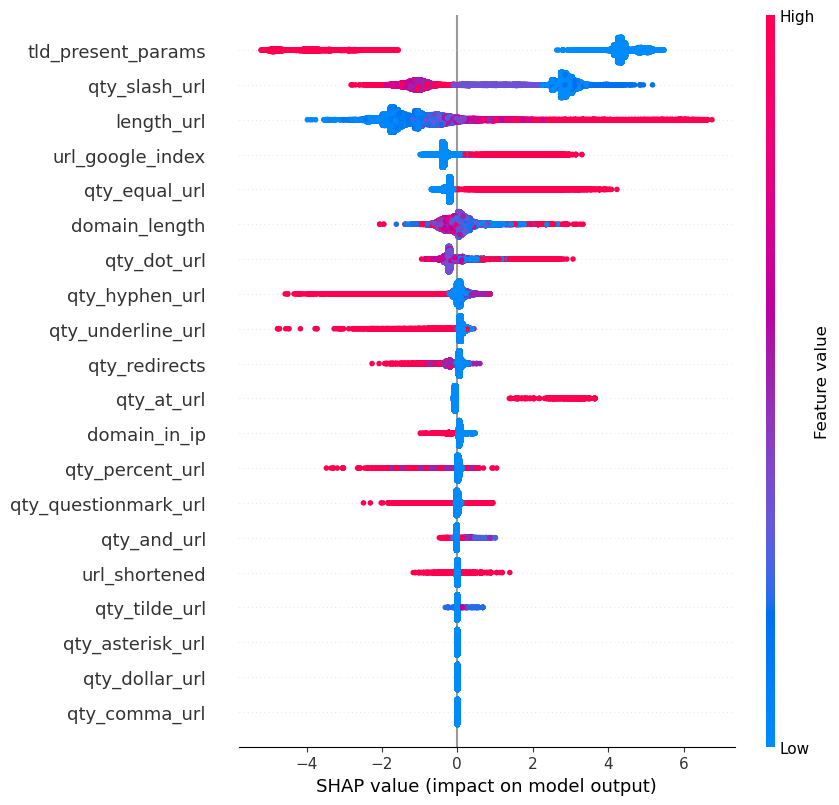

In [22]:
# Train on Dataset-1+2 (Oversampled), Test on Dataset-1+2
shap.plots.beeswarm(shap_values_9, max_display=20)

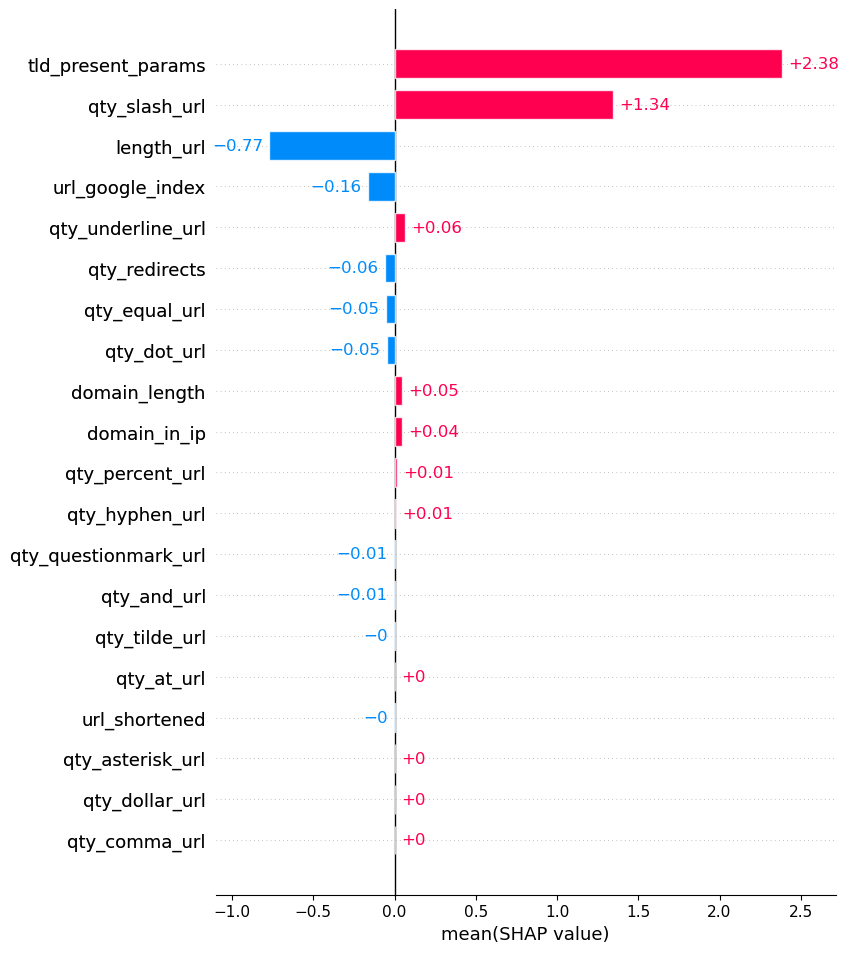

In [23]:
shap.plots.bar(shap_values_9.mean(0), max_display=20)

In [24]:
explainer_7 = shap.Explainer(_70_30_xgb_classifier, df_merged_train[df_merged_train.columns[:-1]])

shap_values_7 = explainer_7(data1[data1.columns[:-1]])

100%|===================| 67020/67222 [02:03<00:00]        

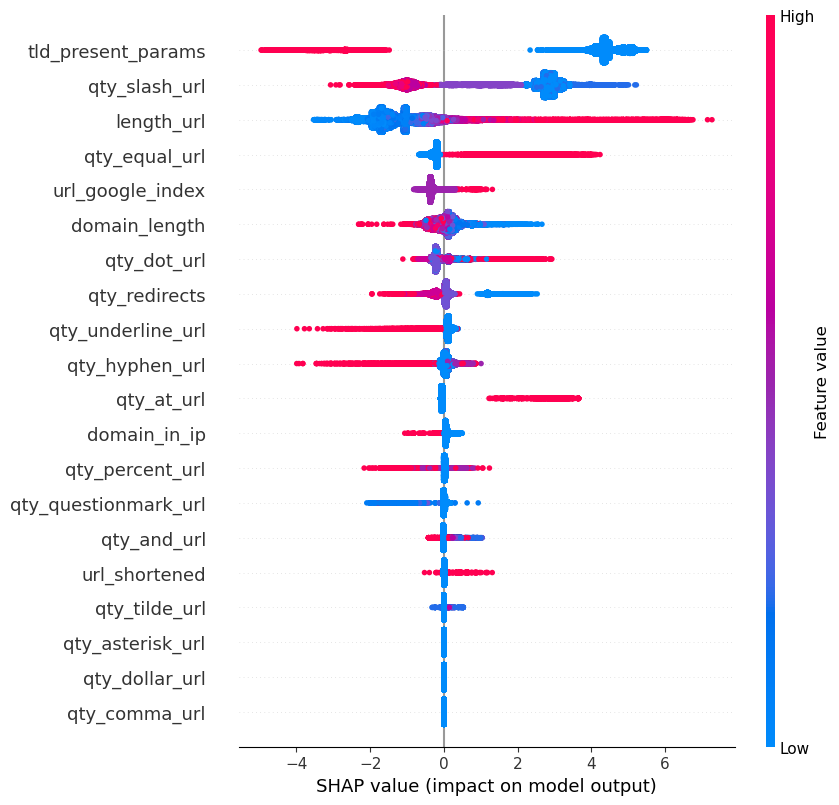

In [25]:
# Train on Dataset-1+2 (Oversampled), Test on Dataset-1
shap.plots.beeswarm(shap_values_7, max_display=20)

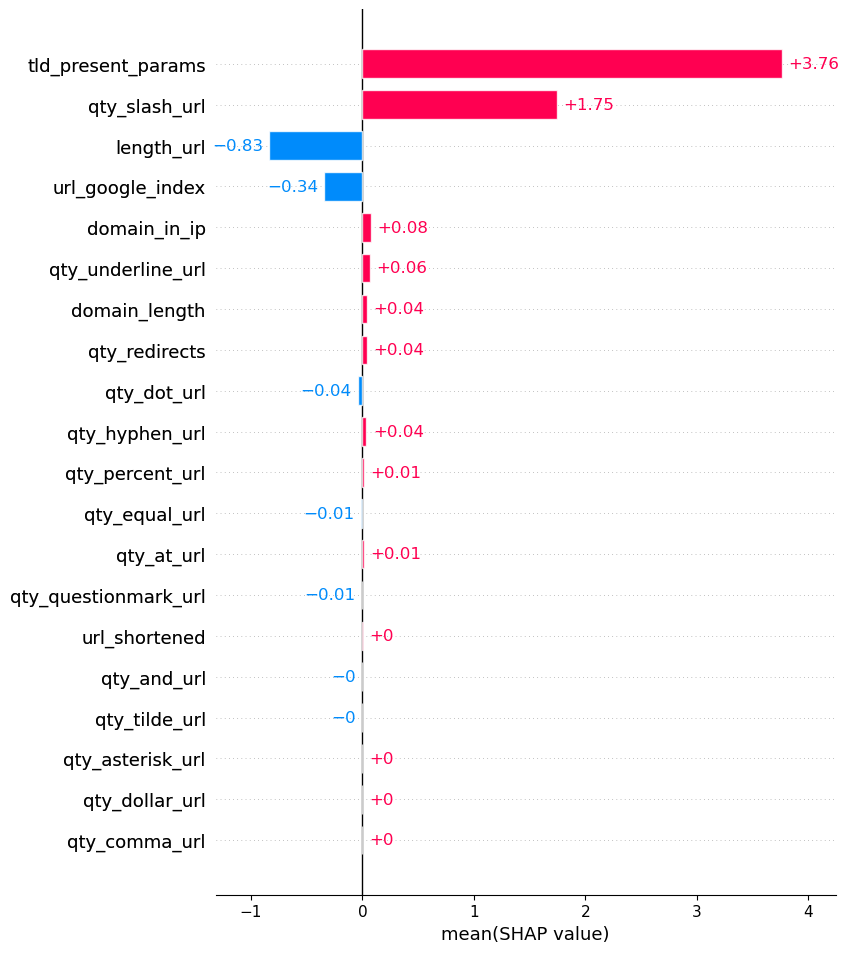

In [26]:
shap.plots.bar(shap_values_7.mean(0), max_display=20)

In [27]:
explainer_8 = shap.Explainer(_70_30_xgb_classifier, df_merged_train[df_merged_train.columns[:-1]])

shap_values_8 = explainer_8(data2[data2.columns[:-1]])

 97%|=================== | 13188/13601 [00:28<00:00]       

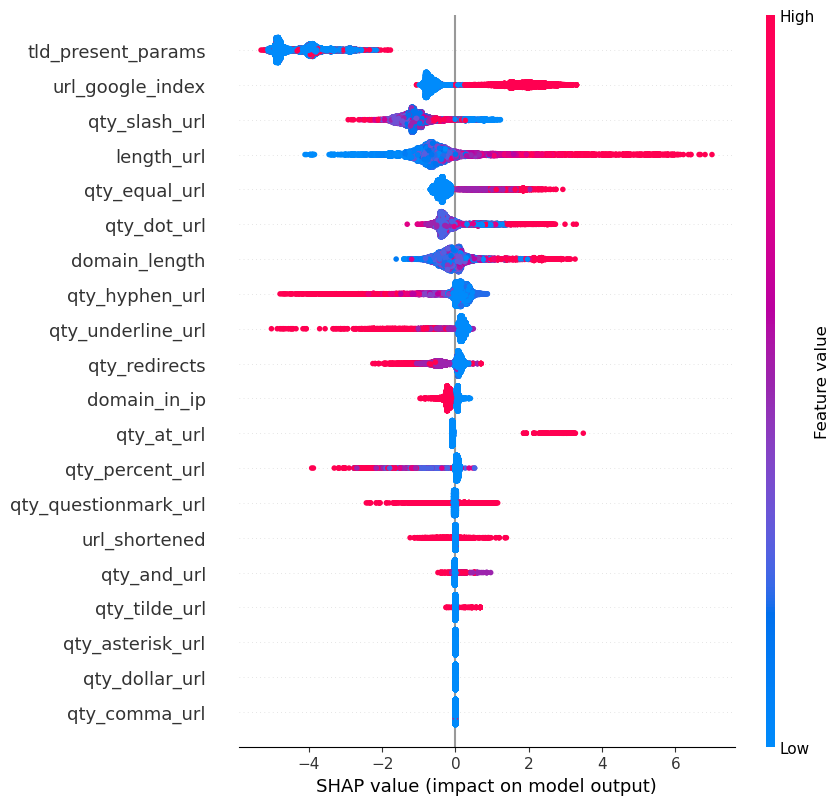

In [28]:
# Train on Dataset-1+2 (Oversampled), Test on Dataset-1
shap.plots.beeswarm(shap_values_8, max_display=20)

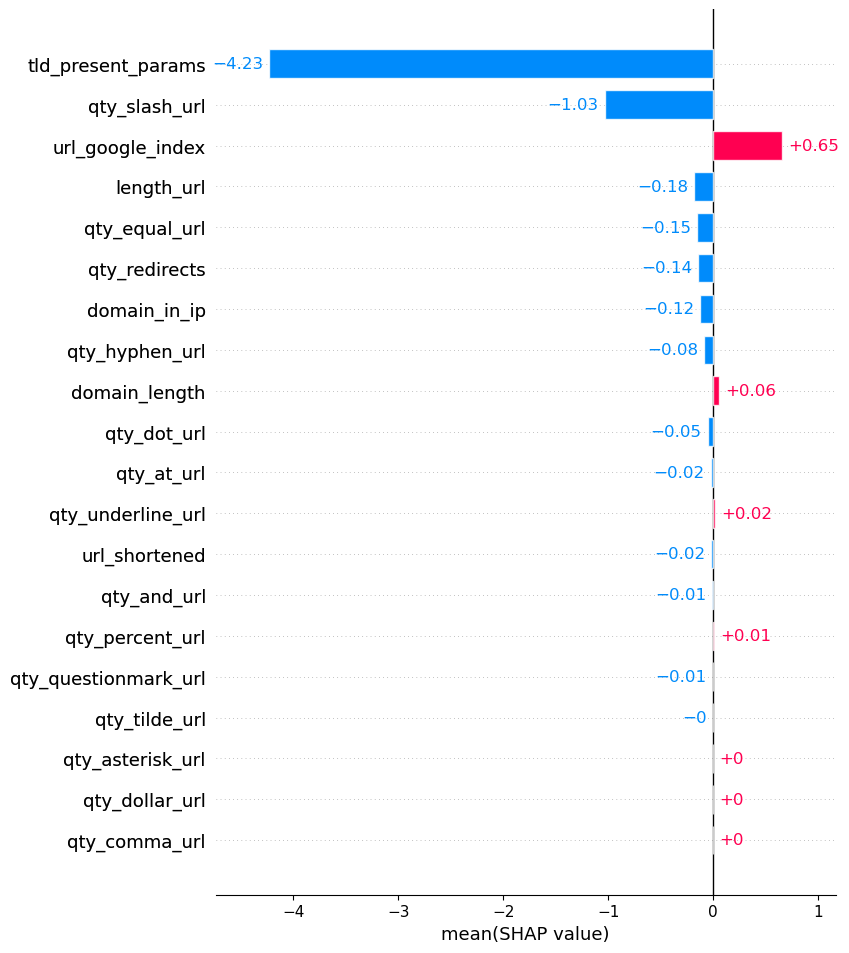

In [29]:
shap.plots.bar(shap_values_8.mean(0), max_display=20)